In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, utils

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)
        img_array = img_array / 255.0

        images.append(img_array)
        labels.append(label)
        
    return images, labels

In [4]:
class1_images, class1_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_1 -Airplane", label="Airplane")

In [5]:
class2_images, class2_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_2 - Cars", label="Car")

In [6]:
class3_images, class3_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_3 - Birds", label="Bird")

In [8]:
class4_images, class4_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_4 - Cats", label="Cat")

In [9]:
class5_images, class5_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_5 - Deers", label="Deer")

In [10]:
class6_images, class6_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_6 - Dogs", label="Dog")

In [11]:
class7_images, class7_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_7 - Frogs", label="Frog")

In [12]:
class8_images, class8_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_8 - Horses", label="Horse")

In [13]:
class9_images, class9_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_9 - Ships", label="Ship")

In [14]:
class10_images, class10_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_10 - Trucks", label="Truck")

In [15]:
class11_images, class11_labels = load_and_preprocess_images("/kaggle/input/mixed-images/mixed_images/Class_11 - Faces", label="Face")

In [17]:
all_images = np.array(class1_images + class2_images + class3_images + class4_images + class5_images + class6_images+class7_images+class8_images+class9_images+class10_images+class11_images)
all_labels = class1_labels + class2_labels + class3_labels + class4_labels+ class5_labels + class6_labels+class7_labels+class8_labels+class9_labels+class10_labels+class11_labels

In [18]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)


In [28]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(11, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [31]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
2753/2753 [==============================] - 27s 6ms/step - loss: 1.1485 - accuracy: 0.5919 - val_loss: 0.9117 - val_accuracy: 0.6786
Epoch 2/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.8181 - accuracy: 0.7133 - val_loss: 0.7965 - val_accuracy: 0.7170
Epoch 3/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.7066 - accuracy: 0.7530 - val_loss: 0.6822 - val_accuracy: 0.7614
Epoch 4/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.6350 - accuracy: 0.7790 - val_loss: 0.6486 - val_accuracy: 0.7756
Epoch 5/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.5851 - accuracy: 0.7968 - val_loss: 0.6372 - val_accuracy: 0.7808
Epoch 6/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.5430 - accuracy: 0.8103 - val_loss: 0.6915 - val_accuracy: 0.7645
Epoch 7/10
2753/2753 [==============================] - 16s 6ms/step - loss: 0.5044 - accuracy: 0.8239 - val_loss: 0.6519 - val_ac

In [32]:
train_loss, train_acc = model.evaluate(X_train, y_train)

2753/2753 [==============================] - 8s 3ms/step - loss: 0.3818 - accuracy: 0.8660


In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

689/689 [==============================] - 2s 3ms/step - loss: 0.6204 - accuracy: 0.7951


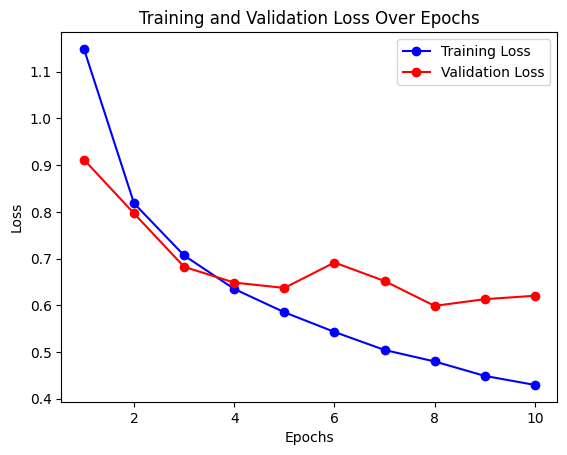

In [34]:
import matplotlib.pyplot as plt


# Extract training and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [35]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)


2753/2753 [==============================] - 6s 2ms/step


In [37]:
y_train_original = label_encoder.inverse_transform(y_train)

# Assuming y_train_pred_binary is your one-hot encoded predictions
y_train_pred_class = np.argmax(y_train_pred_binary, axis=1)

# Convert back to original labels
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_class)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))


print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

train_cm = cm = confusion_matrix(y_train_original, y_train_pred_original)


Train Classification Report:
              precision    recall  f1-score   support

    Airplane       0.49      0.88      0.63      7971
        Bird       0.86      0.76      0.81      8019
         Car       0.97      0.88      0.92      8005
         Cat       0.86      0.66      0.75      7947
        Deer       0.91      0.79      0.85      7986
         Dog       0.76      0.81      0.79      7976
        Face       1.00      1.00      1.00      8067
        Frog       0.91      0.91      0.91      8006
       Horse       0.97      0.75      0.84      8004
        Ship       0.89      0.90      0.90      8093
       Truck       0.94      0.87      0.90      8006

    accuracy                           0.84     88080
   macro avg       0.87      0.84      0.84     88080
weighted avg       0.87      0.84      0.84     88080

Train Confusion Matrix:
[[7050  271   15   18   22   21    0   30   13  472   59]
 [1230 6102    1   85  171  187    1  160   19   50   13]
 [ 417   10 7049  

In [39]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)

y_test_pred_class = np.argmax(y_pred_binary, axis=1)

# Convert back to original labels
y_test_pred_original = label_encoder.inverse_transform(y_test_pred_class)


689/689 [==============================] - 1s 2ms/step


In [41]:
print("Test Classification Report:")
print(classification_report(y_test_original, y_test_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_test_pred_original))

test_cm = confusion_matrix(y_test_original, y_test_pred_original)

Test Classification Report:
              precision    recall  f1-score   support

    Airplane       0.44      0.81      0.57      2039
        Bird       0.75      0.67      0.71      1990
         Car       0.91      0.82      0.86      2004
         Cat       0.76      0.56      0.64      2062
        Deer       0.86      0.71      0.78      2023
         Dog       0.68      0.73      0.70      2033
        Face       0.99      0.99      0.99      1943
        Frog       0.86      0.86      0.86      2003
       Horse       0.92      0.69      0.79      2005
        Ship       0.82      0.85      0.83      1916
       Truck       0.89      0.81      0.85      2003

    accuracy                           0.77     22021
   macro avg       0.81      0.77      0.78     22021
weighted avg       0.80      0.77      0.78     22021

TestConfusion Matrix:
[[1647  125   20    8   13    9    3    8   10  172   24]
 [ 349 1341    5   42   61   78    0   77   16   17    4]
 [ 120    6 1638    9

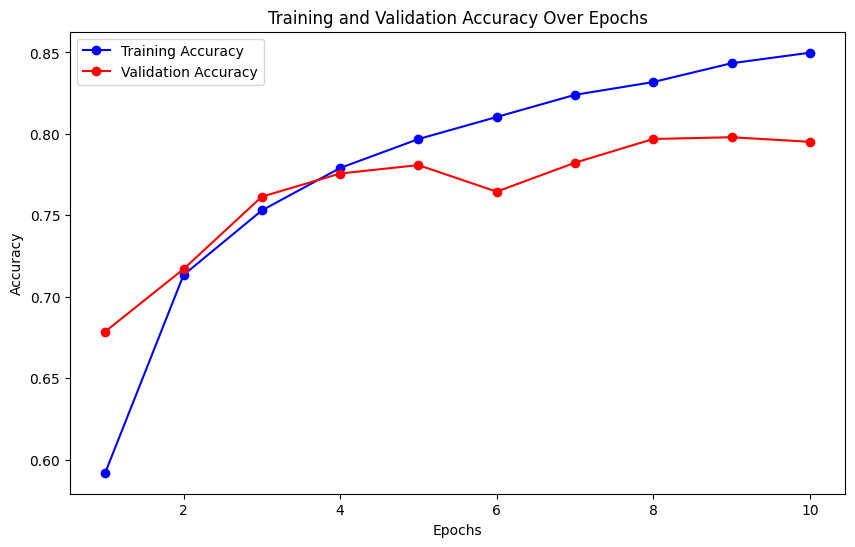

In [42]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [43]:
model.save("ObjectClassifier.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation="softmax"))

# Complitaion
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
